<a href="https://colab.research.google.com/github/nagamamo/international_finance/blob/main/11_euro_cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11　欧州マーストリヒト条約のクラスター分析

　1993年に発効したマーストリヒト条約では、ユーロ参加国に

(1)財政赤字GDP比3％以下、

(2)政府債務残高GDP比60％以下、

(3)長期金利が最も低い3カ国の平均値を2％超上回らないこと、

(4）消費者物価上昇率はEMS加盟国の平均値を1.5％超上回らないこと、

を求めています。

　これら4つの経済収斂条件を、直近いのユーロ加盟国、非加盟国に当てはめた場合、どの国とどの国が(1)～（4）の収斂基準が「近い」のかを本例では計測し、可視化します。

11.1　ライブラリの読み込み

　はじめに4種類のライブラリを読み込みます。

In [15]:
#[1]ライブラリの読み込み
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

11.2　マーストリヒト基準データの読み込み

　続いて(1)財政赤字GDP比、(2)政府債務GDP比、(3)長期金利、(4)インフレ率、の4種類のマーストリヒト基準データを読み込みます。尚、欧州の場合、ユーロ加盟国はすでに中央銀行の金利政策は一元化されていますので、(3)はアジア諸国を標本とする場合のみ採用することにします。

　欧州は2015年、2020年、2022年、アジア諸国は2022年のデータがgithubに格納されていますので、セルの1行目を修正して、分析結果を比較してみてください。

In [ ]:
#[2]データの読み込み
url = "https://github.com/nagamamo/data/blob/main/11_1_eu_maastricht2022.csv?raw=true"#Git-hubからCSVデータの入手
data = pd.read_csv(url)#データフレームの作成
df = data.set_index("id")#国・地域をインデックスへ変更
df.head()

11.3　データの標準化

　4種類(3種類）のデータはそれぞれ水準が異なります。そこで、次セルでは各データから平均値を差し引き、これを除すことで標準化します。

In [35]:
#[3]データの標準化
df1 = (df - df.mean()) / df.std()

11.4　ユークリッド距離の算出

　次に、4つ（3つ）の変数から国・地域同士の距離を算出するための手法を定義し、その距離を算出します。ここではウォード法によりユークリッド距離を計測します。

In [36]:
#[4]クラスタリング（ウォード法、ユークリッド距離）の定義
Z = linkage(df1, method = "ward", metric = "euclidean")

11.5　国・地域名の読み込み

　クラスター分析や主成分分析等の多変量解析では、データラベル数が大規模に上ることが多々発生します。このため、本セルでは、第2セルで読み込んでいる、インデックス化したラベル名をリセットし、d3というラベル名で読み込むことで、省力化します。重要な点は、scipyを用いたクラスター分析を行う場合、このラベル名は、ndarray配列として準備しておくことです。

In [ ]:
#[5]データラベル名の再作成
df1.reset_index(inplace=True) #インデックスをリセット
df2=df1.id #idのみでpandasデータフレームを作成
df3=df2.to_numpy() #pandasデータフレームをndarrayに変換
df3 #確認

11.6　デンドログラムの描出

　最後に標準化したマクロ経済データセット（Z）とラベル(df3)を用いてデンドログラムを描きます。以下のグラフは横軸が4変数(3変数)を用いてウォード法により算出したユークリッド距離、縦軸がラベル(国・地域名)となります。デンドログラムの配色を換えるための距離の閾値を「4」としています。

　結果を見ると、2022年のデータを見る限りでは、ユーロに参加していないノルウェーとトルコの距離が、加盟国に比べて遠いことがわかります。

　その他の点では、フランスが南欧高債務国に囲まれていること、ユーロ非加盟国にも関わらず、ドイツ等のマーストリヒト基準遵守国と距離的に近い国が数カ国存在することがわかります。

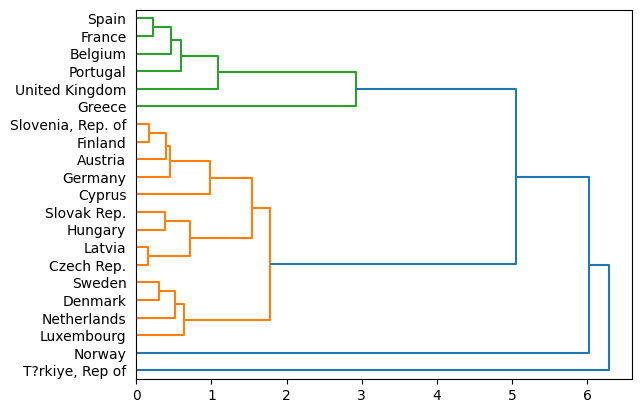

In [38]:
#[6]デンドログラムの描出
dendrogram(Z,labels = df3,
orientation = 'right', # デンドログラム図を横向きにする
color_threshold = 4) # デンドログラム図の色分けの閾値
plt.show()